In [77]:
import pandas as pd
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import plotly.graph_objects as go




In [78]:
bucket='bigdata-project-uncc'

file_key = 'covid-19-world-cases-deaths-testing.csv'

s3uri = 's3://{}/{}'.format(bucket, file_key)

df = pd.read_csv(s3uri)


In [79]:
df.sample()
# df.isnull().sum()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
54021,ISL,Europe,Iceland,2020-12-31,5754.0,0.0,10.143,29.0,0.0,0.143,...,14.3,15.2,NaN,2.91,82.99,0.949,NaN,NaN,NaN,NaN


In [80]:
df.query('total_deaths > 10000')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
765,OWID_AFR,NaN,Africa,2020-06-30,404891.0,11608.0,11496.000,10146.0,269.0,218.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,OWID_AFR,NaN,Africa,2020-07-01,418104.0,13213.0,11762.143,10404.0,258.0,221.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,OWID_AFR,NaN,Africa,2020-07-02,432306.0,14202.0,12085.143,10643.0,239.0,224.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,OWID_AFR,NaN,Africa,2020-07-03,447466.0,15160.0,12594.000,10882.0,239.0,228.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,OWID_AFR,NaN,Africa,2020-07-04,462951.0,15485.0,13058.000,11083.0,201.0,228.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130852,OWID_WRL,NaN,World,2021-11-07,249890329.0,343644.0,451939.143,5049265.0,4394.0,6981.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
130853,OWID_WRL,NaN,World,2021-11-08,250371526.0,481197.0,460302.000,5055955.0,6690.0,7042.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
130854,OWID_WRL,NaN,World,2021-11-09,250850973.0,479447.0,467277.714,5064332.0,8377.0,7202.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
130855,OWID_WRL,NaN,World,2021-11-10,251424349.0,573376.0,475118.429,5072444.0,8112.0,7176.714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='date'>

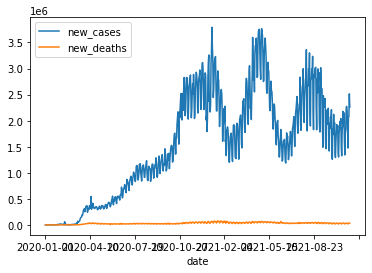

In [81]:
df.groupby('date')['new_cases', 'new_deaths'].sum().plot(kind = 'line')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='continent'>

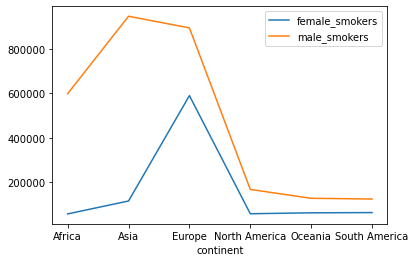

In [82]:
df.groupby('continent')['female_smokers', 'male_smokers'].sum().plot(kind = 'line')

<AxesSubplot:xlabel='continent'>

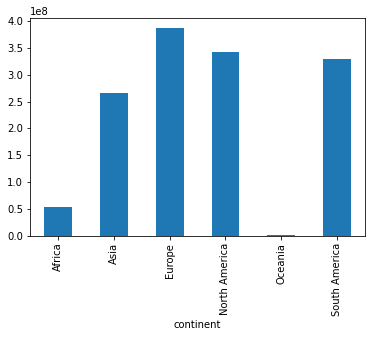

In [83]:
df.groupby('continent')['total_deaths'].sum().plot(kind = 'bar')